In [1]:
import sys
sys.path.insert(0, '../src/data')
import geopandas as gpd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os

In [3]:
import bame_datastore

bame_datastore.lib

{'mortality': ['fbook_covid_data',
  'bame_rpt_deaths',
  'bame_rpt_excess_deaths'],
 'explanatory': ['ethnicity_data', 'bame_rpt_cases'],
 'other': ['lad_geog']}

In [5]:
deaths_df  = bame_datastore.fbook_covid_data.df.iloc[:,4:] # reading the data object
deaths_df.set_index(bame_datastore.fbook_covid_data.lad_col) # using the object attribute to get lad name
deaths_df.drop(deaths_df.columns[1], axis=1, inplace=True)
deaths_df

,LTLA Name,2020-05-07 00:00:00,2020-05-08 00:00:00,2020-05-09 00:00:00,2020-05-10 00:00:00,2020-05-11 00:00:00,2020-05-12 00:00:00,2020-05-13 00:00:00,2020-05-14 00:00:00,2020-05-15 00:00:00,...,2020-05-26 00:00:00,2020-05-27 00:00:00,2020-05-28 00:00:00,2020-05-29 00:00:00,2020-05-30 00:00:00,2020-05-31 00:00:00,2020-06-01 00:00:00,2020-06-02 00:00:00,2020-06-03 00:00:00,2020-06-04 00:00:00
0,Barking and Dagenham,466.0,469.0,473.0,476.0,477.0,477.0,479.0,479.0,481.0,...,496.0,496.0,496.0,498.0,498.0,497.0,497.0,497.0,497.0,499.0
1,Barnet,1235.0,1241.0,1245.0,1250.0,1252.0,1253.0,1254.0,1256.0,1265.0,...,1285.0,1287.0,1288.0,1289.0,1291.0,1296.0,1298.0,1299.0,1299.0,1299.0
2,Bexley,653.0,661.0,664.0,666.0,666.0,671.0,671.0,674.0,680.0,...,713.0,714.0,714.0,716.0,717.0,717.0,720.0,724.0,727.0,727.0
3,Brent,1392.0,1394.0,1405.0,1408.0,1410.0,1419.0,1420.0,1423.0,1424.0,...,1467.0,1470.0,1470.0,1471.0,1471.0,1472.0,1471.0,1476.0,1478.0,1477.0
4,Bromley,1132.0,1144.0,1157.0,1165.0,1184.0,1199.0,1206.0,1213.0,1221.0,...,1273.0,1274.0,1275.0,1275.0,1278.0,1278.0,1279.0,1280.0,1281.0,1282.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,Ceredigion,37.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,...,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0
366,Pembrokeshire,233.0,236.0,245.0,248.0,251.0,251.0,255.0,255.0,261.0,...,278.0,278.0,278.0,278.0,278.0,278.0,278.0,279.0,279.0,279.0
367,Powys,197.0,198.0,199.0,204.0,209.0,216.0,226.0,227.0,227.0,...,272.0,276.0,281.0,283.0,284.0,285.0,285.0,286.0,286.0,287.0
368,Neath Port Talbot,517.0,518.0,522.0,523.0,527.0,535.0,540.0,543.0,548.0,...,597.0,598.0,599.0,602.0,603.0,603.0,604.0,606.0,606.0,606.0


In [ ]:
#plot time line of deaths by lad
# plot_deaths_df = deaths_df.melt(id_vars=["LTLA Name"], var_name="Date", value_name="Value")
# ax = sns.lineplot(x="Date", y="Value", hue="LTLA Name",data=plot_deaths_df)

# Using Geography

In [8]:
lad_gdf = bame_datastore.lad_geog.gdf.set_index("lad09nm")
df = deaths_df.set_index("LTLA Name").join(lad_gdf) # join the deaths and ethnicity data by local authority
gdf = gpd.GeoDataFrame(df, geometry=df.geometry)

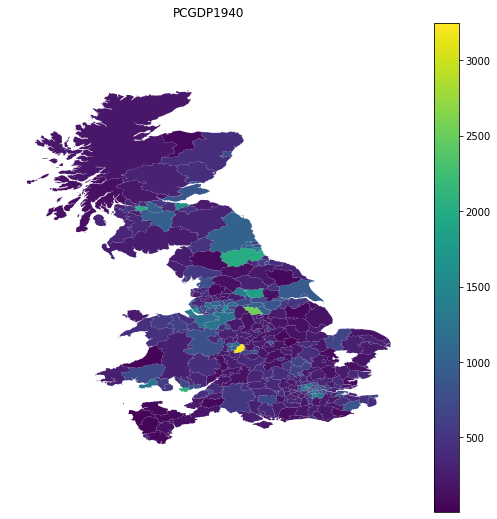

In [9]:
f, ax = plt.subplots(1, figsize=(9, 9))
gdf.plot(ax=ax, column='2020-06-04 00:00:00', legend=True,)# scheme='Quantiles', fmt='{:.0f}')
ax.set_axis_off()
ax.set_title('PCGDP1940')
plt.axis('equal')
plt.show()